# Data Analyst NanoDegree Project II

## Data Wrangling - We Rate Dogs



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#analysisnviz">Data Analysis and Visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I will be wrangling in this notebook is the is the tweet archive of WeRateDgs, account handle @dog_rates on twitter.

Data will be sourced from the files listed below, assessed, cleaned, and insights drawn from it.
- twitter-archive-enhanced.csv
- image-predictions.tsv
- tweet-json.txt

### Load Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from pandas.api.types import CategoricalDtype

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer
from IPython import display

# Show visuals
%matplotlib inline

# Set background of graphs to darkgrid
sns.set_style("darkgrid")

# Set size of plots
plt.figure(figsize=(6, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<a id='gathering'></a>
## Data Gathering

In [2]:
# Import enhanced twitter archive csv file

twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
twitter_arch.expanded_urls.nunique()

2218

In [6]:
# Import image predictions tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# Read image predictions tsv file
image_pred = pd.read_csv('image-predictions.tsv', sep='\t' )

In [7]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
# Read tweet json text file by line, write them to dictionaries and cast to a dataframe

# Create empty list
df_list=[]
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        retweeted = tweets['retweeted']
        # Append the dictionaries to the empty list created
        df_list.append({'tweet_id' : tweet_id, 'retweet_count' : retweet_count, 'favorite_count':favorite_count, 'retweeted':retweeted})

# Create dataframe from list
tweet_data = pd.DataFrame(df_list, columns = ['tweet_id' , 'retweet_count', 'favorite_count', 'retweeted'])

In [10]:
tweets

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 340, 'h': 255, 'resize': 'fit'},
     'medium': {'w': 600, 'h': 450, 'resize': 'fit

In [11]:
tweet_data.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


In [12]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


In [13]:
# Alternative twitter data extraction code

'''
# Define key, token and secrets
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'


# Query twitter API for tweets and save the output as json
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#Use OAuthHandler, wait for rate limit to end and print out notification when fetching tweets
twitter_api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)


#Define dict to hold IDs that won't be fetched
missed_tweets = {}

# Get start time
start = time.time()

# Fetch tweets and store the collected json in a .txt file
with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
    for tweet_id in tweet_ids:
        print(str(tweet_id))
        try:
            tweet = twitter_api.get_status(tweet_id, tweet_mode = 'extended')
            print('fetched')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except: tweepy.errors.TweepyWxcwption as err:
            print('failed')
            missed_tweets[tweet_id] = err
            pass



#Get end time
end = time.time()

#Duration of execution
print('Fetching tweets took:{((end-start)/60)} minutes')


'''

"\n# Define key, token and secrets\nconsumer_key = 'consumer_key'\nconsumer_secret = 'consumer_secret'\naccess_token = 'access_token'\naccess_secret = 'access_secret'\n\n\n# Query twitter API for tweets and save the output as json\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\n#Use OAuthHandler, wait for rate limit to end and print out notification when fetching tweets\ntwitter_api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)\n\n\n#Define dict to hold IDs that won't be fetched\nmissed_tweets = {}\n\n# Get start time\nstart = time.time()\n\n# Fetch tweets and store the collected json in a .txt file\nwith open('tweet_json.txt', 'w', encoding='utf-8') as outfile:\n    for tweet_id in tweet_ids:\n        print(str(tweet_id))\n        try:\n            tweet = twitter_api.get_status(tweet_id, tweet_mode = 'extended')\n            print('fetched')\n            json.dump(tweet._json, outfile)\n       

<a id='assessing'></a>
## Assessing Data

- Assessing data visually and programatically to identify quality and tidiness issues

### Assess Twitter Archive Data

#### Visual Assessment

In [14]:

twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
# Visual assessment on excel from exported csv
large_num = twitter_arch[twitter_arch.rating_numerator>15]
large_num.to_csv('large_numerators.csv', index = False)

#### Programmatic Assessment

In [16]:
# View info
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
# View data statistics
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# Check for duplicates in entire dataframe
twitter_arch.duplicated().sum()

0

In [19]:
# Check for duplicates in columns

# Describe function to check duplicates

def find_duplicates(df):
    for col in df.columns:
        dup = df[col].duplicated().sum()
        print(col, ':', dup)

In [20]:
find_duplicates(twitter_arch)

tweet_id : 0
in_reply_to_status_id : 2278
in_reply_to_user_id : 2324
timestamp : 0
source : 2352
text : 0
retweeted_status_id : 2174
retweeted_status_user_id : 2330
retweeted_status_timestamp : 2174
expanded_urls : 137
rating_numerator : 2316
rating_denominator : 2338
name : 1399
doggo : 2354
floofer : 2354
pupper : 2354
puppo : 2354


In [21]:
twitter_arch.tweet_id.nunique()

2356

In [22]:
# See value counts of unique entries in columns
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [24]:
large_num = twitter_arch[twitter_arch.rating_numerator>20]
large_num['text']

188     @dhmontgomery We also gave snoop dogg a 420/10...
189     @s8n You tried very hard to portray this good ...
290                                    @markhoppus 182/10
313     @jonnysun @Lin_Manuel ok jomny I know you're e...
340     RT @dog_rates: This is Logan, the Chow who liv...
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
902     Why does this never happen at my front door......
979     This is Atticus. He's quite simply America af....
1120    Say hello to this unbelievably well behaved sq...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy 

In [25]:
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [26]:
twitter_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [27]:
twitter_arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [28]:
twitter_arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [29]:
twitter_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [30]:
# Have a look at dog names
twitter_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [31]:
# Some names seem to be off: wrong name from tweet must have been picked
odd_names = twitter_arch[twitter_arch.name.str.islower()]
odd_names.name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [32]:
# See how many odd names exist

odd_names.name.nunique()

25

In [33]:
twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Assess Image Prediction Data

#### Visual Assessment

In [34]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Programmatic Assessment

In [35]:
# View first 5 rows
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
# View info
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
# View data statistics
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [38]:
# Check entire dataframe for duplicates
image_pred.duplicated().sum()

0

In [39]:
# Check for duplicates in columns using pre-defined function
find_duplicates(image_pred)

tweet_id : 0
jpg_url : 66
img_num : 2071
p1 : 1697
p1_conf : 69
p1_dog : 2073
p2 : 1670
p2_conf : 71
p2_dog : 2073
p3 : 1667
p3_conf : 69
p3_dog : 2073


### Assess Tweet JSON Data

#### Visual Assessment

In [40]:
tweet_data

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False
...,...,...,...,...
2349,666049248165822465,41,111,False
2350,666044226329800704,147,311,False
2351,666033412701032449,47,128,False
2352,666029285002620928,48,132,False


#### Programmatic Assessment

In [41]:
# View first 5 rows
tweet_data.head()

,tweet_id,retweet_count,favorite_count,retweeted
0,892420643555336193,8853,39467,False
1,892177421306343426,6514,33819,False
2,891815181378084864,4328,25461,False
3,891689557279858688,8964,42908,False
4,891327558926688256,9774,41048,False


In [42]:
# View info
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


In [43]:
# View data statistics
tweet_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [44]:
# Check entire dataframe for duplicates
tweet_data.duplicated().sum()

0

In [45]:
# Check for duplicates in columns using pre-defined function
find_duplicates(tweet_data)

tweet_id : 0
retweet_count : 630
favorite_count : 347
retweeted : 2353


### Findings

#### Quality
###### twitter_arch
- Wrong datatype on tweet_id column; Wrong datatype on timestamp column
- Entries with retweet_status_id contain retweeted tweets 
- There are rating_denominator entries that are not 10
- Incorrect numerator values
- Some dog names are unusual; possibly picked the wrong section of the tweet
- Missing data in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- Columns with unnecessary data

###### image_pred
- Wrong datatype on tweet_id
- Inconsistent capitalization in breed names

###### tweet_data
- Wrong datatype on tweet_id, favorite_count and retweet_count columns


#### Tidiness
###### twitter_arch
- Dog stages can be combined into 1 column
- Month and year data can be derived from timesstamp column for visualization
- Source column content can be better represented to identify source of ratings and source URL

###### image_pred
- The confidence interval columns present as pivoted data, dataframe can be condensed to better represent this information

###### general tidiness
- The 3 datasets can be merged on tweet_id to form 1 dataset

<a id='cleaning'></a>
## Cleaning Data

### Cleaning Data Quality Issues
#### twitter_arch

- ##### *Wrong datatype on tweet_id and timestamp columns*

#### Define

Change datatype of tweet_id to string using astype function

Change datatype of timestamp to datetime

#### Code

In [46]:
# Make a copy of the dataframe
twitter_arch_clean = twitter_arch.copy()

In [47]:
# Change tweet_id column type to string
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)
# Change timestamp datatype to datetime
twitter_arch_clean.timestamp = pd.to_datetime(twitter_arch_clean.timestamp)

#### Test

In [48]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

- ##### *Entries with retweet_status_id contain retweeted tweets*

#### Define
Get rid of rewtweeted data points by getting the snippet of data where retweeted_status_id is null

#### Code

In [49]:
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean['retweeted_status_user_id'].isna()]

#### Test

In [50]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

- #### *Incorrect numerator values*

#### Define

After visual assessment of the twitter_arch_clean from the exported csv file, the entries that are greater than 15 and less than 10 have been evaluated and the correct rating identified from the tweet text. 
Becasue they aren't too many, these will be directly sssigned based on the tweet id

#### Code

In [51]:
# convert datatype to float
#twitter_arch_clean.rating_numerator = twitter_arch_clean.rating_numerator.astype(float)


#twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
#twitter_archive_clean.text.str.extract('(\d+(\.\d+)?\/\d+(\.\d+)?)', expand = True)[0]

In [52]:
#Building from reviewer recommendation
# Use regex to extract ratings from scratch and assign obtained values
df = twitter_arch_clean.copy()
df['rating'] = df.text.str.extract('(\d+(\.\d+)?\/\d+(\.\d+)?)', expand = True)[0]
df['numerator'] = df['rating'].str.split('/', expand = True)[0]

twitter_arch_clean['rating_numerator'] = df['numerator']



In [53]:
# Individually assign correct rating to select values above 10 that had wrong rating

twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 881633300179243008), 'rating_numerator'] = 13
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 835246439529840640), 'rating_numerator'] = 13
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 820690176645140481), 'rating_numerator'] = 12
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 713900603437621249), 'rating_numerator'] = 11
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 710658690886586372), 'rating_numerator'] = 10
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 704054845121142784), 'rating_numerator'] = 12
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 697463031882764288), 'rating_numerator'] = 11
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 684225744407494656), 'rating_numerator'] = 13
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 684222868335505415), 'rating_numerator'] = 11
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 677716515794329600), 'rating_numerator'] = 12
twitter_arch_clean.loc[(twitter_arch_clean.tweet_id == 675853064436391936), 'rating_numerator'] = 11

# Change datatype to float
twitter_arch_clean.rating_numerator  = twitter_arch_clean.rating_numerator.astype(float)

#### Test

In [54]:
twitter_arch_clean.rating_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.700e+01, 1.100e+01,
       1.000e+01, 4.200e+02, 6.660e+02, 6.000e+00, 1.820e+02, 1.500e+01,
       9.600e+02, 0.000e+00, 7.000e+00, 8.400e+01, 2.400e+01, 9.750e+00,
       5.000e+00, 1.127e+01, 3.000e+00, 8.000e+00, 9.000e+00, 4.000e+00,
       1.650e+02, 1.776e+03, 2.040e+02, 5.000e+01, 9.900e+01, 8.000e+01,
       4.500e+01, 6.000e+01, 4.400e+01, 1.000e+00, 1.430e+02, 1.210e+02,
       2.000e+01, 9.500e+00, 1.126e+01, 2.000e+00, 1.440e+02, 8.800e+01])

- ##### *There are rating_denominator entries that are not 10*

#### Define
Change all entries of the rating_denominator column to 10

#### Code

In [55]:
# Assign all column entries to 10
twitter_arch_clean['rating_denominator'] = 10

#### Test

In [56]:
twitter_arch_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [57]:
twitter_arch_clean.query('rating_denominator != 10').count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

- ##### *Some dog names are unusual; possibly picked the wrong section of the tweet*


#### Define

These dog names start with lowercase letters and are possibly as a result in erroneous name picking by the tool used to extract them and will be replaced by 'Unknown'

We have enties of dogname 'None'. These will be replaced by 'Unknown as well'

#### Code

In [58]:
# Replace 'None' with Unknown
twitter_arch_clean.name = twitter_arch_clean.name.replace('None','Unknown')

# Replace entries with lowercase values with 'Unknown'
odd_names = twitter_arch_clean[twitter_arch_clean.name.str.islower()]
odd = odd_names.name.unique()
for name in odd:
    twitter_arch_clean.name = twitter_arch_clean.name.replace(odd,'Unknown')

#### Test

In [59]:
# View names
twitter_arch_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Unknown',
       'Jax', 'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart',
       'Oliver', 'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hob

In [60]:
# See if wrong stripped names appear in dataset
odd_names = twitter_arch_clean[twitter_arch_clean.name.str.islower()]
odd_names.name.unique()

array([], dtype=object)

In [61]:
#See if any names are 'None'
none_name = twitter_arch_clean[twitter_arch_clean.name == 'None']
none_name

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- ##### *Source column content can be better represented to identify source of ratings*

#### Define

The source of the data can be clearly identified by extracting actual data from the html string from the 'source' column using strip function; source url can be extracted using regex

##### Code

In [62]:
# Extract source URL
twitter_arch_clean['source_url'] = twitter_arch_clean.source.str.extract('((http://)([a-zA-Z.\w//\s]+))')[0]

In [63]:
# extract source text from source column
twitter_arch_clean.source = twitter_arch_clean.source.str.split('>',expand = True)[1].str.split('<', expand = True)[0]

#### Test

In [64]:
twitter_arch_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

- #### *Missing data in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp*

#### Define

These columns have a significant amount of missing data and should therefore be dropped

#### Code

In [65]:
# Drop columns
twitter_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [66]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
 12  source_url          2164 non-null 

- #### *Columns with unnecessary data*

#### Define

Columns with unnecessary data are in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_url. The first 5 columns have been dropped above. expanded_url will be dropped as well

#### Code

In [67]:
twitter_arch_clean.drop(['expanded_urls'], axis = 1, inplace = True)

#### Test

In [68]:
twitter_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'source_url'],
      dtype='object')

##### image_pred

- #### *Wrong datatype on tweet_id*

#### Define

Change datatype on tweet_id from int to string using astype function

#### Code



In [69]:
# Make a copy of the data
image_pred_clean = image_pred.copy()

In [70]:
# Change tweet_id column type to string
image_pred_clean.tweet_id = image_pred_clean.tweet_id.astype(str)

#### Test


In [71]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


- #### *Inconsistent formating of dog breeds*

#### Define

Some dog breeds start with a capital letter and others don't. To maintain consistensy, have the first letters of every word capitalized.

Words are also separated by _. The _ will be removed and title function used in breed name

#### Code

In [72]:
# View different breeds in p1, p2 and p3

In [73]:
image_pred_clean.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [74]:
image_pred_clean.p2.unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone',
       'Rottweiler', 'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [75]:
image_pred_clean.p3.unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'dingo', 'power_drill', 'Saluki',
       'Great_Pyrenees', 'West_Highland_white_terrier', 'collie',
       'toy_poodle', 'vizsla', 'acorn', 'giant_schnauzer', 'teddy',
       'common_iguana', 'wig', 'water_buffalo', 'coyote', 'seat_belt',
       'kelpie', 'space_heater', 'Brabancon_griffon', 'standard_poodle',
       'beagle', 'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [76]:
# Remove _
image_pred_clean.p1 = image_pred_clean.p1.str.replace('_', ' ')
image_pred_clean.p2 = image_pred_clean.p2.str.replace('_', ' ')
image_pred_clean.p3 = image_pred_clean.p3.str.replace('_', ' ')

In [77]:
# Capitalize all first letters
image_pred_clean.p1 = image_pred_clean.p1.str.title()
image_pred_clean.p2 = image_pred_clean.p2.str.title()
image_pred_clean.p3 = image_pred_clean.p3.str.title()

#### Test

In [78]:
image_pred_clean.p1.unique()

array(['Welsh Springer Spaniel', 'Redbone', 'German Shepherd',
       'Rhodesian Ridgeback', 'Miniature Pinscher',
       'Bernese Mountain Dog', 'Box Turtle', 'Chow', 'Shopping Cart',
       'Miniature Poodle', 'Golden Retriever', 'Gordon Setter',
       'Walker Hound', 'Pug', 'Bloodhound', 'Lhasa', 'English Setter',
       'Hen', 'Desktop Computer', 'Italian Greyhound', 'Maltese Dog',
       'Three-Toed Sloth', 'Ox', 'Malamute', 'Guinea Pig',
       'Soft-Coated Wheaten Terrier', 'Chihuahua',
       'Black-And-Tan Coonhound', 'Coho', 'Toy Terrier',
       'Blenheim Spaniel', 'Pembroke', 'Llama',
       'Chesapeake Bay Retriever', 'Curly-Coated Retriever', 'Dalmatian',
       'Ibizan Hound', 'Border Collie', 'Labrador Retriever', 'Seat Belt',
       'Snail', 'Miniature Schnauzer', 'Airedale', 'Triceratops', 'Swab',
       'Hay', 'Hyena', 'Jigsaw Puzzle', 'West Highland White Terrier',
       'Toy Poodle', 'Giant Schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian Husky', 'T

In [79]:
image_pred_clean.p2.unique()

array(['Collie', 'Miniature Pinscher', 'Malinois', 'Redbone',
       'Rottweiler', 'English Springer', 'Mud Turtle', 'Tibetan Mastiff',
       'Shopping Basket', 'Komondor', 'Yorkshire Terrier',
       'English Foxhound', 'Bull Mastiff', 'German Shepherd', 'Shih-Tzu',
       'Newfoundland', 'Cock', 'Desk', 'Toy Terrier', 'Toy Poodle',
       'Otter', 'Chesapeake Bay Retriever', 'Siberian Husky', 'Skunk',
       'Afghan Hound', 'Bloodhound', 'Barracouta', 'Papillon',
       'Cocker Spaniel', 'Chow', 'Irish Terrier', 'Chain Saw', 'Beagle',
       'Giant Schnauzer', 'Labrador Retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'Slug', 'Brittany Spaniel', 'Standard Schnauzer',
       'Teddy', 'Armadillo', 'African Hunting Dog', 'Vizsla', 'Doormat',
       'Pug', 'Italian Greyhound', 'Samoyed', 'Pomeranian',
       'Miniature Poodle', 'Lakeland Terrier', 'Irish Setter', 'Swab',
       'Malamute', 'Bath Towel', 'Border Collie', 'Leonberg', 'Drake',
       'French Bulldog', 'Ice Bear', 

In [80]:
image_pred_clean.p3.unique()

array(['Shetland Sheepdog', 'Rhodesian Ridgeback', 'Bloodhound',
       'Miniature Pinscher', 'Doberman', 'Greater Swiss Mountain Dog',
       'Terrapin', 'Fur Coat', 'Golden Retriever',
       'Soft-Coated Wheaten Terrier', 'Labrador Retriever', 'Pekinese',
       'Ibizan Hound', 'French Bulldog', 'Malinois', 'Dandie Dinmont',
       'Borzoi', 'Partridge', 'Bookcase', 'Basenji', 'Miniature Poodle',
       'Great Grey Owl', 'Groenendael', 'Eskimo Dog', 'Hamster', 'Briard',
       'Papillon', 'Flat-Coated Retriever', 'Gar', 'Chihuahua',
       'Shih-Tzu', 'Pomeranian', 'Dingo', 'Power Drill', 'Saluki',
       'Great Pyrenees', 'West Highland White Terrier', 'Collie',
       'Toy Poodle', 'Vizsla', 'Acorn', 'Giant Schnauzer', 'Teddy',
       'Common Iguana', 'Wig', 'Water Buffalo', 'Coyote', 'Seat Belt',
       'Kelpie', 'Space Heater', 'Brabancon Griffon', 'Standard Poodle',
       'Beagle', 'Irish Water Spaniel', 'Bluetick', 'Weimaraner',
       'Chesapeake Bay Retriever', 'Toilet Tiss

##### tweet_data

- ####  *Wrong data type on favorite_count column*

#### Define

Change datatype from float to integer using astype function

#### Code 

In [81]:
# Make a copy of the dataset
tweet_data_clean = tweet_data.copy()

In [82]:
tweet_data_clean.favorite_count = tweet_data_clean.favorite_count.astype(int)

#### Test

In [83]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


- ####  *Wrong data type on retweet_count column*

#### Define

Change datatype from float to integer using astype function

#### Code 

In [84]:
tweet_data_clean.retweet_count = tweet_data_clean.retweet_count.astype(int)

In [85]:
#### Test

In [86]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
 3   retweeted       2354 non-null   bool 
dtypes: bool(1), int64(3)
memory usage: 57.6 KB


- #### *Wrong datatype on tweet_id*

#### Define

- Change datatype on tweet_id from int to string using astype function

##### Code

In [87]:
# Change tweet_id column type to string
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype(str)

#### Test

In [88]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   retweeted       2354 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 57.6+ KB


### Cleaning Data Tidiness Issues

###### twitter_arch
- #### *Dog stages can be combined into 1 column*

#### Define

- Replace 'None' string in the dog stage columns with an empty string '' using a for loop with a replace function
- Use the pandas str and cat functions to convert the dog stages to a new single column and drop the doggo, floofer, pupper and puppo columns

#### Code

In [89]:
# For loop to replace None with blanks
dog_stage = ['doggo', 'pupper', 'floofer', 'puppo']
for col in dog_stage:
       twitter_arch_clean[col] = twitter_arch_clean[col].replace('None', '')

# Create new column
twitter_arch_clean['dog_stage'] = twitter_arch_clean.doggo.str.cat(twitter_arch_clean.floofer).str.cat(twitter_arch_clean.pupper).str.cat(twitter_arch_clean.puppo)

#Fill the blanks with NaN
twitter_arch_clean['dog_stage'] = twitter_arch_clean['dog_stage'].replace('', np.nan)

# Drop 
twitter_arch_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

#### Test

In [90]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   source_url          2164 non-null   object             
 8   dog_stage           344 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(6)
memory usage: 169.9+ KB


In [91]:
twitter_arch_clean.dog_stage.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

- #### *Month and year data can be derived from timestamp column for visualization*

#### Define
By using the datetime function, the month and year can be pulled from the timestamp column

#### Code

In [92]:
# Pull month and year from timestamp column
twitter_arch_clean['month'] = twitter_arch_clean.timestamp.dt.month
twitter_arch_clean['year'] = twitter_arch_clean.timestamp.dt.year

#### Test

In [93]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   source_url          2164 non-null   object             
 8   dog_stage           344 non-null    object             
 9   month               2175 non-null   int64              
 10  year                2175 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 203.9+ KB


###### image_pred
- #### *The confidence interval and dog breed columns present as pivoted data, dataframe can be condensed to better represent this information*

#### Define
Dog breed to be identified using if image being a dog is True

This will be achieved by an if else loop. The propable breed will be selected from checking if P1_conf identifies a dog or not. If it does, it selects this with its respective interval. This will be cascaded down to p2 and p3.

The original columns will then be dropped.

[Ref](https://towardsdatascience.com/the-most-efficient-if-elif-else-in-pandas-d4a7d4502d50)

#### Code

In [94]:
image_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [95]:
# Empty list of variables tht will be used as columns
breed = []
conf_lvl = []

# Function to pick breed and confidence level of breed from dataframe
def breed_conf(row):


    # Define conditions in if elif statement
    if row.p1_dog == True:
        breed.append(row.p1)
        conf_lvl.append(row.p1_conf)
    elif row.p2_dog == True:
        breed.append(row.p2)
        conf_lvl.append(row.p2_conf)
    elif row.p3_dog== True:
        breed.append(row.p3)
        conf_lvl.append(row.p3_conf)
    else:
        breed.append('Unknown')
        conf_lvl.append('error')

In [96]:
# Apply the function         
image_pred_clean.apply(breed_conf, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2075, dtype: object

In [97]:
# Create new column from the series created by the function
image_pred_clean['breed'] = breed
image_pred_clean['conf_lvl'] = conf_lvl

In [98]:
# List df columns
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed', 'conf_lvl'],
      dtype='object')

In [99]:
# Drop other columns
image_pred_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [100]:
# View How many returned 'error'

unknown_breed = image_pred_clean[image_pred_clean.conf_lvl == 'error']
unknown_breed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  324 non-null    object
 1   jpg_url   324 non-null    object
 2   img_num   324 non-null    int64 
 3   breed     324 non-null    object
 4   conf_lvl  324 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.2+ KB


In [101]:
# Drop columns where breed could not be identified

image_pred_clean = image_pred_clean[image_pred_clean.conf_lvl != 'error']

#### Test

In [102]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   object
 1   jpg_url   1751 non-null   object
 2   img_num   1751 non-null   int64 
 3   breed     1751 non-null   object
 4   conf_lvl  1751 non-null   object
dtypes: int64(1), object(4)
memory usage: 82.1+ KB


In [103]:
image_pred_clean.head(30)

,tweet_id,jpg_url,img_num,breed,conf_lvl
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Golden Retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,Golden Retriever,0.77593


###### general
- #### *The 3 datasets can be merged on tweet_id to form 1 dataset*

#### Define

These 3 datasets need to be merged on tweet id column for easy analysis. We'll first get the shape of all datasets then use the merge function to combine them

#### Code

In [104]:
print('twitter_arch_clean shape:', twitter_arch_clean.shape)
print('image_pred_clean shape:', image_pred_clean.shape)
print('tweet_data_clean shape:', tweet_data_clean.shape)

twitter_arch_clean shape: (2175, 11)
image_pred_clean shape: (1751, 5)
tweet_data_clean shape: (2354, 4)


In [105]:
# Merge datsaets

master_tweet_data = twitter_arch_clean.merge(image_pred_clean,on='tweet_id').merge(tweet_data_clean,on='tweet_id')

#### Test

In [106]:
master_tweet_data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,source_url,dog_stage,month,year,jpg_url,img_num,breed,conf_lvl,retweet_count,favorite_count,retweeted
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,http://twitter.com/download/iphone,NaN,8,2017,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819,False
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,http://twitter.com/download/iphone,NaN,7,2017,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461,False
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,http://twitter.com/download/iphone,NaN,7,2017,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908,False
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,http://twitter.com/download/iphone,NaN,7,2017,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048,False
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10,Unknown,http://twitter.com/download/iphone,NaN,7,2017,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,3261,20562,False


In [107]:
master_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   object             
 3   text                1686 non-null   object             
 4   rating_numerator    1686 non-null   float64            
 5   rating_denominator  1686 non-null   int64              
 6   name                1686 non-null   object             
 7   source_url          1677 non-null   object             
 8   dog_stage           260 non-null    object             
 9   month               1686 non-null   int64              
 10  year                1686 non-null   int64              
 11  jpg_url             1686 non-null   object             
 12  img_num             1686 non-null 

<a id='storing'></a>
## Storing Data

In [108]:
# Write to csv file

master_tweet_data.to_csv('twitter_archive_master.csv', index=False)

<a id='analysisnviz'></a>
## Data Analysis and Visualization

In [109]:
master_tweet_data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,source_url,dog_stage,month,year,jpg_url,img_num,breed,conf_lvl,retweet_count,favorite_count,retweeted
0,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,http://twitter.com/download/iphone,NaN,8,2017,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819,False
1,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,http://twitter.com/download/iphone,NaN,7,2017,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461,False
2,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,http://twitter.com/download/iphone,NaN,7,2017,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086,8964,42908,False
3,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,http://twitter.com/download/iphone,NaN,7,2017,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,9774,41048,False
4,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10,Unknown,http://twitter.com/download/iphone,NaN,7,2017,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595,3261,20562,False


In [110]:
master_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 0 to 1685
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1686 non-null   object             
 1   timestamp           1686 non-null   datetime64[ns, UTC]
 2   source              1686 non-null   object             
 3   text                1686 non-null   object             
 4   rating_numerator    1686 non-null   float64            
 5   rating_denominator  1686 non-null   int64              
 6   name                1686 non-null   object             
 7   source_url          1677 non-null   object             
 8   dog_stage           260 non-null    object             
 9   month               1686 non-null   int64              
 10  year                1686 non-null   int64              
 11  jpg_url             1686 non-null   object             
 12  img_num             1686 non-null 

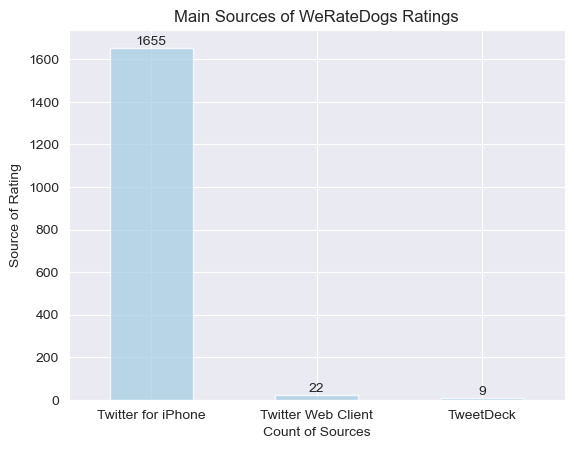

In [111]:
# Most common source of data
ax = master_tweet_data.source.value_counts().plot(kind = 'bar', alpha=0.75, colormap='Paired')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Main Sources of WeRateDogs Ratings')
plt.xticks(rotation='horizontal')
plt.xlabel('Count of Sources')
plt.ylabel('Source of Rating')
plt.savefig('sources.png')

#### *Insight*:  Majority of twitter users rating these dogs are using Twitter for iPhone

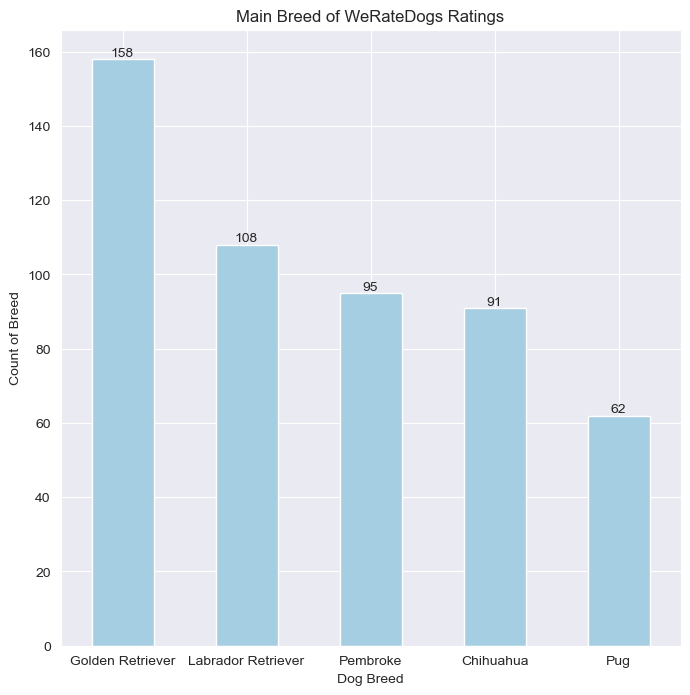

In [112]:
# Most common breed
breed = master_tweet_data.breed.value_counts().head(5)

ax =breed.plot(kind = 'bar', figsize = (8,8), colormap='Paired')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Main Breed of WeRateDogs Ratings')
plt.xlabel('Dog Breed')
plt.xticks(rotation='horizontal')
plt.ylabel('Count of Breed')
plt.savefig('breed.png')

#### *Insight* : Most common dogs in the dataset are Golden Retreivers, Labrador Retreivers and Pembrokes

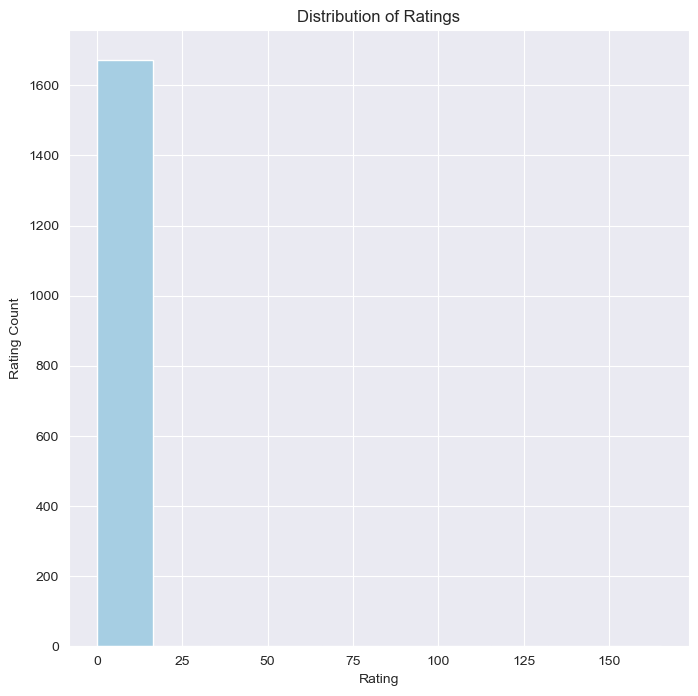

In [113]:

# Plot histogram to show distribution of ratings
ax =master_tweet_data.rating_numerator.plot(kind = 'hist', figsize = (8,8), colormap='Paired')
#ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.savefig('ratings.png')


In [114]:
# Subset data where rating is < 15(majority)
df_below_15 = master_tweet_data[master_tweet_data.rating_numerator<=15]

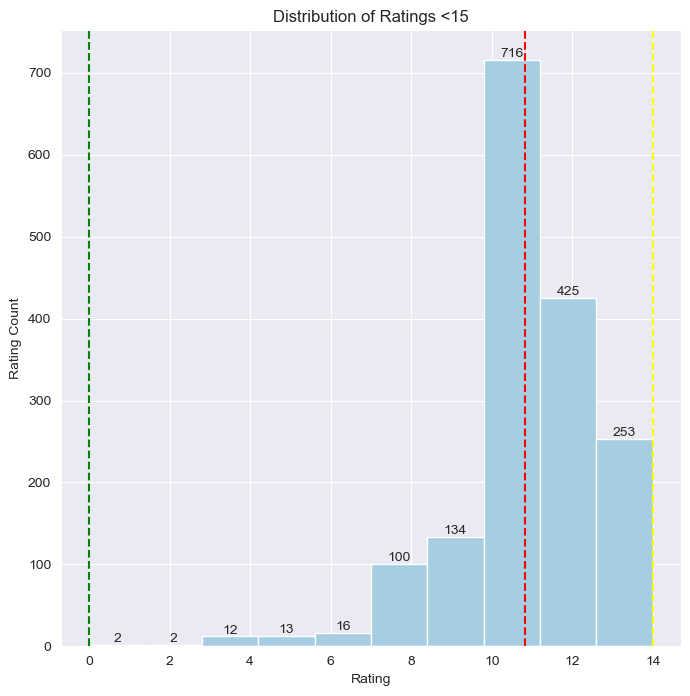

In [115]:

# Plot histogram to show distribution of ratings

# Get stats
minm = df_below_15.rating_numerator.min()
maxm = df_below_15.rating_numerator.max()
avg = df_below_15.rating_numerator.mean()

ax =df_below_15.rating_numerator.plot(kind = 'hist', figsize = (8,8), colormap='Paired')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Distribution of Ratings <15')
plt.xlabel('Rating')
plt.ylabel('Rating Count')

# Plot stat lines
plt.axvline(x=minm, color='green', linestyle='dashed')
plt.axvline(x=maxm, color='yellow', linestyle='dashed')
plt.axvline(x=avg , color='red', linestyle='dashed')
plt.savefig('ratings_less_15.png')
#df_below_15.rating_numerator.hist()


#### *Insight* : After removing the outliers in the rating_numerator column, we see that the distribution is now skewed to the left. We have dogs with a rating as low as 0 and the mean at around 11

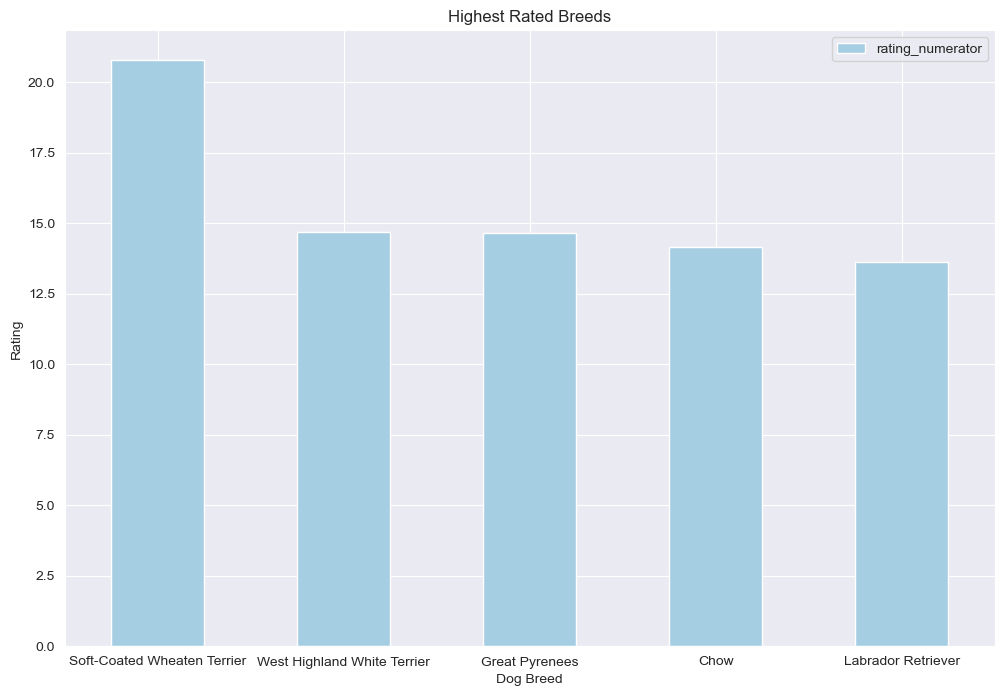

In [116]:
# Highest rated Dogs

high_rate = pd.DataFrame(master_tweet_data.groupby('breed')['rating_numerator'].mean()).sort_values(by = 'rating_numerator',ascending = False).head(5)
ax =high_rate.plot(kind = 'bar', figsize = (12,8), colormap='Paired')
#ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Highest Rated Breeds')
plt.xlabel('Dog Breed')
plt.xticks(rotation='horizontal')
plt.ylabel('Rating')
plt.savefig('high_rated.png')

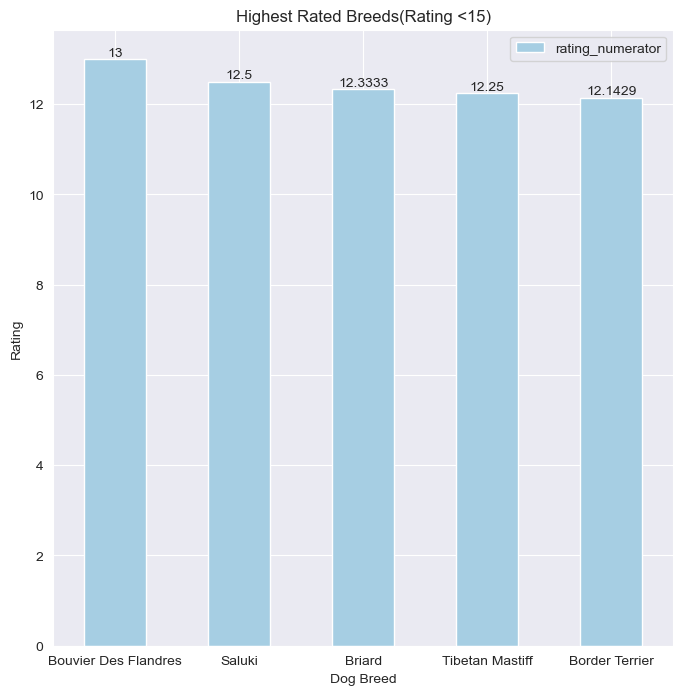

In [117]:
# Highest rated Dogs without large value outliers

high_rate = pd.DataFrame(df_below_15.groupby('breed')['rating_numerator'].mean()).sort_values(by = 'rating_numerator',ascending = False).head(5)
ax =high_rate.plot(kind = 'bar', figsize = (8,8), colormap='Paired')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Highest Rated Breeds(Rating <15)')
plt.xlabel('Dog Breed')
plt.xticks(rotation='horizontal')
plt.ylabel('Rating')
plt.savefig('high_rated_less15.png')

#### *Insight* : After removing the outliers in the rating_numerator column, we see that the dog breed receiving the higest rating changes from Clumber to Bouvier Des Flandres

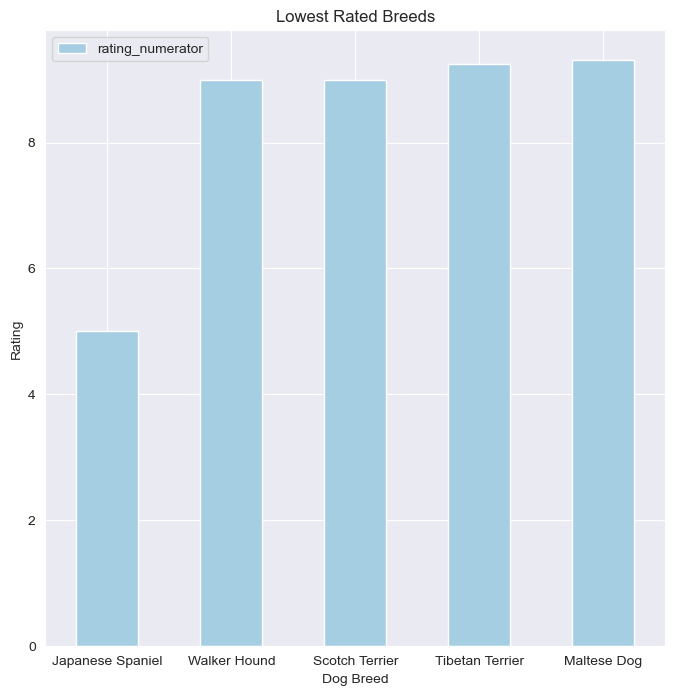

In [118]:
# Lowest rated Dogs

low_rate = pd.DataFrame(master_tweet_data.groupby('breed')['rating_numerator'].mean()).sort_values(by = 'rating_numerator',ascending = True).head(5)
ax =low_rate.plot(kind = 'bar', figsize = (8,8), colormap='Paired')
#ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Lowest Rated Breeds')
plt.xlabel('Dog Breed')
plt.xticks(rotation='horizontal')
plt.ylabel('Rating')
plt.savefig('low_rated.png')

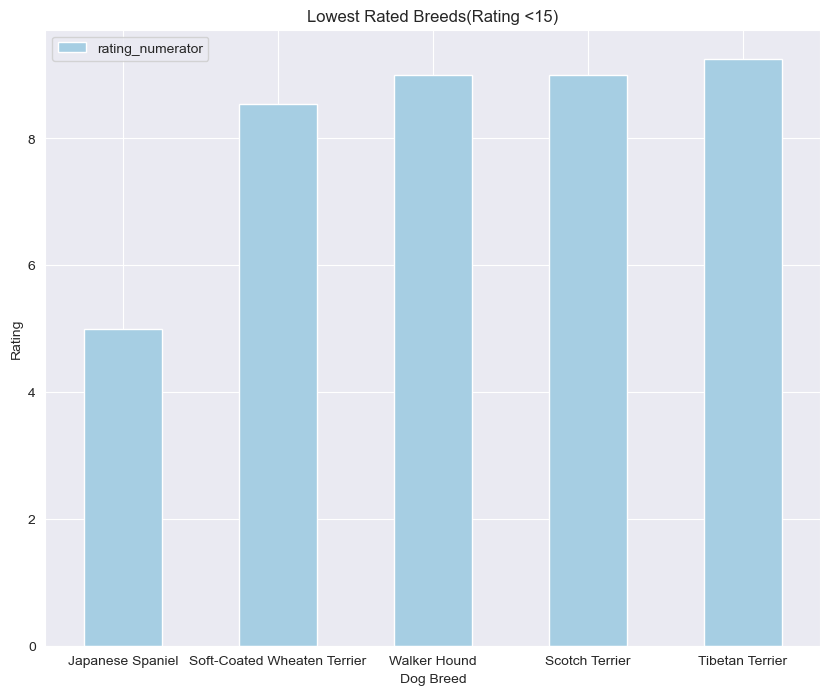

In [119]:
# Lowest rated Dogs

low_rate = pd.DataFrame(df_below_15.groupby('breed')['rating_numerator'].mean()).sort_values(by = 'rating_numerator',ascending = True).head(5)
ax =low_rate.plot(kind = 'bar', figsize = (10,8), colormap='Paired')
#ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Lowest Rated Breeds(Rating <15)')
plt.xlabel('Dog Breed')
plt.xticks(rotation='horizontal')
plt.ylabel('Rating')
plt.savefig('low_rated_less15.png')

#### *Insight* : The dog breed with the lowest rating is the Japanese Spaniel. However, the breed with the second lowest ratings on average changes from a Walker Hound to a Soft Coated Wheaten Terrier because there were certain image(s) that were rated higher than usual

In [120]:
# Have a look at dog(s) with lowest rating

low_rating = master_tweet_data[master_tweet_data.rating_numerator==0]
low_rating.jpg_url

208    https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
Name: jpg_url, dtype: object

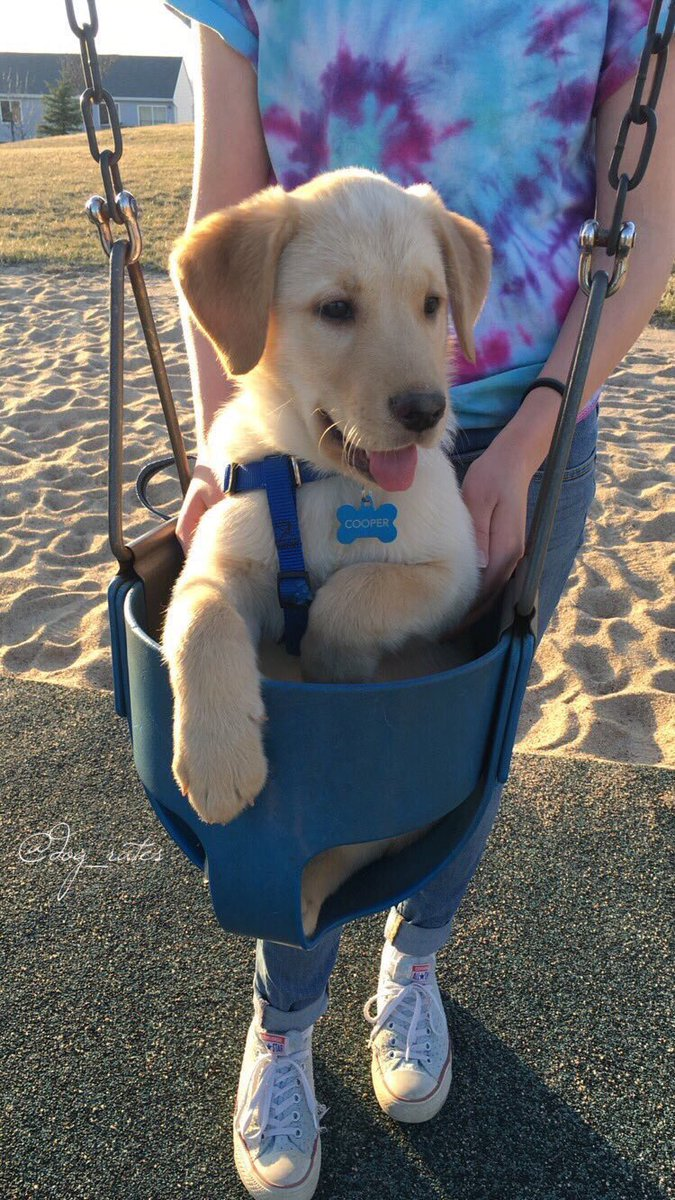

In [121]:
display.Image('https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg')

This must have been an erroneous rating because... how adorable is Cooper!!